In [1]:
import numpy as np
import scipy as sp
from scipy import sparse
from scipy.sparse import linalg

import matplotlib.pyplot as plt
from IPython.display import clear_output


In [2]:
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
ϕ = lambda x: x/np.sqrt(2)
B = lambda x,α: (x-α)/(1-α*x)

In [4]:
np.random.seed(0)

Ns = [100,500,2000]

n_trials = 10
n_pts = 20
αs = np.linspace(0,1,n_pts)


In [5]:
BPnorm = np.zeros((len(Ns),n_trials,n_pts))
for l,N in enumerate(Ns):
    for i in range(n_trials):

        G = np.random.randn(N,N)+1j*np.random.randn(N,N)
        G /= np.sqrt(2*N)
        
        Λ,V = np.linalg.eig(G)
        Vinv = np.linalg.inv(V)
        
        for j,α in enumerate(αs):
            clear_output(wait=True)
            print(N,i,j)
            
            u,s,v=sp.sparse.linalg.svds(V@np.diag(B(ϕ(Λ),α))@Vinv,k=1)
            BPnorm[l,i,j] = s

2000 9 19


In [6]:
np.save('BPnorm',BPnorm)
BPnorm = np.load('BPnorm.npy')

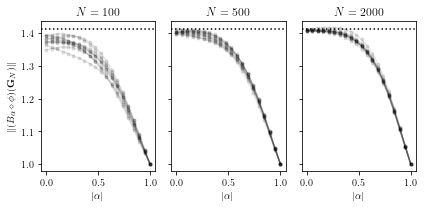

In [7]:
fig,axs = plt.subplots(1,len(Ns),figsize=(6,3),sharey=True,sharex=True)
fig.subplots_adjust(wspace=0.1)

for l,N in enumerate(Ns):

    for i in range(n_trials):
        axs[l].plot(αs,BPnorm[l,i],color='k',marker='.',alpha=.1)
    axs[l].set_xlabel(r'$|\alpha|$')
    axs[l].set_title(f'$N={N}$')

    axs[l].axhline(np.sqrt(2),color='k',ls=':')

axs[0].set_ylabel('$\| (B_{\\alpha}\circ \phi)(\mathbf{G}_N) \|$')
#axs[0].set_ylabel('$\| (z\mathbf{I} - \mathbf{G}_N)^{-1} \|$')

fig.tight_layout()
plt.savefig('imgs/BP_norm.pdf')